In [39]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import json

# Preparing Data

In [40]:
first_round_perfornance = pd.read_csv('Data/first_round_final_performance.csv',index_col= 0)
# first_round_perfornance.columns = ['mturkID', 'first_go2avoidPun', 'first_go2win', 'first_nogo2avoidPun', 'first_nogo2win']
second_round_perfornance = pd.read_csv('Data/second_round_final_performance.csv',index_col= 0)
# second_round_perfornance.columns = ['mturkID', 'second_go2avoidPun', 'second_go2win', 'second_nogo2avoidPun', 'second_nogo2win']


In [41]:
all_performance = pd.merge(second_round_perfornance, first_round_perfornance, on = 'mturkID', how = 'left')
all_performance.gender_second_session = all_performance.gender_second_session.map({'female':'female','other':'female','male':'male'})
all_performance.gender_first_session = all_performance.gender_first_session.map({'female':'female','other':'female','male':'male'})
all_performance = all_performance.drop_duplicates()

# First Hypothesis
1. Our first hypothesis is that Pavlovian bias in learning is a stable, trait-like characteristic of human agents. 

In [42]:
all_performance['first_rel_nogo2win'] = all_performance['go2win_first_session'] - all_performance['nogo2win_first_session'] 
all_performance['second_rel_nogo2win'] = all_performance['go2win_second_session'] - all_performance['nogo2win_second_session'] 

all_performance['first_rel_nogo2avoidPun'] = all_performance['go2win_first_session'] - all_performance['nogo2avoidPun_first_session']
all_performance['second_rel_nogo2avoidPun'] = all_performance['go2win_second_session'] - all_performance['nogo2avoidPun_second_session'] 


# No Go to Win Conditions

### Absolute performance

In [6]:
test_res = stats.pearsonr(all_performance.nogo2win_first_session, all_performance.nogo2win_second_session)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.3765645776592518
p-value:  0.015236990672853798


<AxesSubplot:xlabel='nogo2win_first_session', ylabel='nogo2win_second_session'>

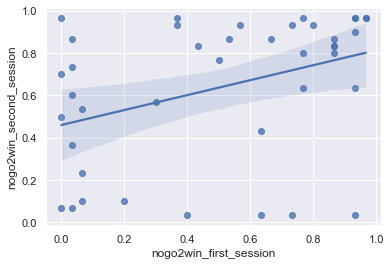

In [7]:
sns.regplot(x = all_performance.nogo2win_first_session, y = all_performance.nogo2win_second_session)

In [18]:
smf.ols(formula = 'nogo2win_second_session ~ nogo2win_first_session', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     nogo2win_second_session   R-squared:                       0.142
Model:                                 OLS   Adj. R-squared:                  0.120
Method:                      Least Squares   F-statistic:                     6.444
Date:                     Sat, 11 Dec 2021   Prob (F-statistic):             0.0152
Time:                             22:05:30   Log-Likelihood:                -10.150
No. Observations:                       41   AIC:                             24.30
Df Residuals:                           39   BIC:                             27.73
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4601      0.086      5.369      0.000       0.287       0.633
nogo2win_first_session     0.3529      0.139      2.539      0.015       0.072       0.634
==============================================================================
Omnibus:                        5.858   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.478
Skew:                          -0.894   Prob(JB):                       0.0647
Kurtosis:                       2.909   Cond. No.                         3.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Relative performace

In [19]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2win, all_performance.second_rel_nogo2win)
print('correlation between first and second round actual performance: ', test_res[0])
print('p-value: ', test_res[1])

correlation between first and second round actual performance:  0.3257279745282606
p-value:  0.037688065963665744


<AxesSubplot:xlabel='first_rel_nogo2win', ylabel='second_rel_nogo2win'>

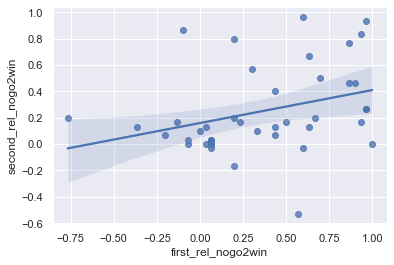

In [20]:
sns.regplot(x = all_performance.first_rel_nogo2win, y = all_performance.second_rel_nogo2win)

### robust regression

In [108]:
huber_t = sm.RLM(all_performance.first_rel_nogo2win, sm.add_constant(all_performance.second_rel_nogo2win), M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(
    hub_results.summary(
        yname="y", xname=["var_%d" % i for i in range(len(hub_results.params))]
    )
)

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   41
Model:                            RLM   Df Residuals:                       39
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 15 Dec 2021                                         
Time:                        01:30:58                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.2639      0.086      3.061      0.0

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# No Go to Avoid Punishment Conditions

### Absolute performance

In [21]:
test_res = stats.pearsonr(all_performance.nogo2avoidPun_first_session, all_performance.nogo2avoidPun_second_session)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.551984200470278
p-value:  0.00018307491874388861


<AxesSubplot:xlabel='nogo2avoidPun_first_session', ylabel='nogo2avoidPun_second_session'>

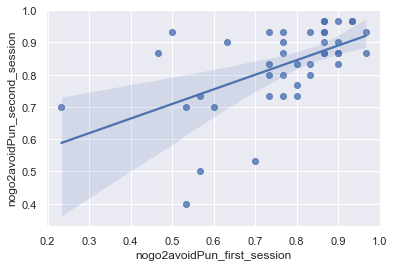

In [22]:
sns.regplot(x = all_performance.nogo2avoidPun_first_session, y = all_performance.nogo2avoidPun_second_session)

### Relative

In [23]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2avoidPun, all_performance.second_rel_nogo2avoidPun)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.04185341768820239
p-value:  0.7950036572096056


<AxesSubplot:xlabel='first_rel_nogo2avoidPun', ylabel='second_rel_nogo2avoidPun'>

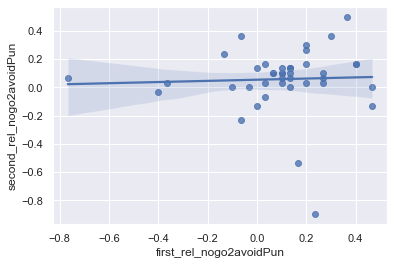

In [24]:
sns.regplot(x = all_performance.first_rel_nogo2avoidPun, y = all_performance.second_rel_nogo2avoidPun)

# First and Second difference

In [25]:
performance_difference = all_performance[['go2avoidPun_second_session', 'go2win_second_session','nogo2avoidPun_second_session', 'nogo2win_second_session','go2avoidPun_first_session', 'go2win_first_session',
       'nogo2avoidPun_first_session', 'nogo2win_first_session']].melt()

def extract_condition(x):
    if('nogo2avoidPun' in x):
        return 'nogo2avoidPun'
    elif('nogo2win' in x):
        return 'nogo2win'
    elif( 'go2avoidPun' in x):
        return 'go2avoidPun'
    elif( 'go2win' in x):
        return 'go2win'
    else:
        return 'error'

def extract_session(x):
    if('first' in x):
        return 'first'
    elif('second' in x):
        return 'second'
    else:
        return 'error'

performance_difference['condition'] = performance_difference.variable.apply(lambda x: extract_condition(x))

performance_difference['session'] = performance_difference.variable.apply(lambda x: extract_session(x))


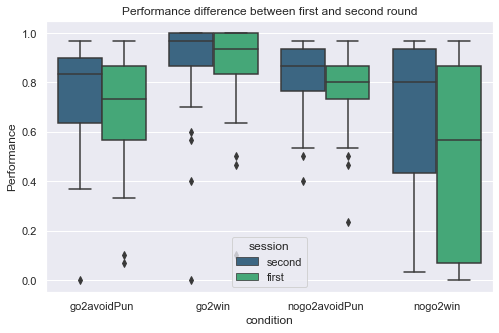

In [26]:
plt.figure(figsize=(8,5))
# sns.swarmplot(x = 'condition', y = 'value', hue = 'session', dodge=True, palette='viridis', data = performance_difference)
sns.boxplot(x = 'condition', y = 'value', hue = 'session',  palette='viridis', data = performance_difference)
plt.title('Performance difference between first and second round')
plt.ylabel('Performance')
plt.show()

# Second Hypothesis

In [43]:
Questionnare_data = pd.read_csv('Data/cleaned_questionnaire_data.csv', index_col= 0)
Questionnare_data.columns = ['mturkID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', 'weight', 'heightfeet', 'heightinch', 'pet-1',
       'pet-type', 'pet-number', 'pet-timeperiod', 'pet-0']

In [44]:
Questionnare_data['has_pet'] = np.logical_not(Questionnare_data['pet-0'] == 'no') + (Questionnare_data['pet-1'] == 'yes') 

In [76]:
Questionnare_data['restraint'] = ((Questionnare_data['1']) + Questionnare_data['2'] + Questionnare_data['3'] + (Questionnare_data['4']) + (Questionnare_data['5']))/5
Questionnare_data['eating_concern'] = ((Questionnare_data['7']) + Questionnare_data['9'] + Questionnare_data['20'] + (Questionnare_data['19']) + (Questionnare_data['21']))/5
Questionnare_data['weight_concern'] = ((Questionnare_data['22']) + Questionnare_data['24'] + Questionnare_data['8'] + (Questionnare_data['25']) + (Questionnare_data['12']))/5
Questionnare_data['shape_concern'] = ((Questionnare_data['6']) + Questionnare_data['8'] + Questionnare_data['23'] + (Questionnare_data['10']) + (Questionnare_data['26']) \
    + Questionnare_data['27'] + Questionnare_data['28'] + Questionnare_data['11'])/8

Questionnare_data['data_quality'] = Questionnare_data['1'] + Questionnare_data['2'] + Questionnare_data['3'] + Questionnare_data['4'] + Questionnare_data['5'] + Questionnare_data['6'] + Questionnare_data['7'] + Questionnare_data['8'] + Questionnare_data['9'] + Questionnare_data['10'] + Questionnare_data['11'] + Questionnare_data['12'] + Questionnare_data['13'] + Questionnare_data['14'] + Questionnare_data['15'] + Questionnare_data['16'] + Questionnare_data['17'] + Questionnare_data['18'] + Questionnare_data['19'] + Questionnare_data['20'] + Questionnare_data['21'] + Questionnare_data['22'] + Questionnare_data['23'] + Questionnare_data['24'] + Questionnare_data['25'] + Questionnare_data['26'] + Questionnare_data['27'] + Questionnare_data['28'] 

Questionnare_data['global_score'] = (Questionnare_data['restraint'] + Questionnare_data['eating_concern'] + Questionnare_data['weight_concern'] + Questionnare_data['shape_concern'])/4



In [81]:
Questionnare_data['height_m'] = Questionnare_data['heightfeet'] * 0.3048 + Questionnare_data['heightinch'] * 0.0254 
Questionnare_data['weight_kg'] = Questionnare_data['weight']*0.453592
Questionnare_data['BMI'] = Questionnare_data['weight_kg']/Questionnare_data['height_m']**2

In [82]:
perf_questionnaire_data = pd.merge(Questionnare_data, all_performance, on='mturkID' )
perf_questionnaire_data['nogo2win_mean_performance'] = (perf_questionnaire_data['nogo2win_first_session'] + perf_questionnaire_data['nogo2win_second_session'])/2
# nogo2win_mean_performance

In [83]:

perf_questionnaire_data["pet-type"] = perf_questionnaire_data["pet-type"].map(lambda x: x if type(x)!=str else x.lower())

In [38]:
# perf_questionnaire_data.to_csv('Data/performance_questionnaire_data_first.csv')

# An Exclusion criteria added to data 

In [84]:
perf_questionnaire_data = perf_questionnaire_data[(perf_questionnaire_data['data_quality'] != 0)]

# Eating Disorder Index Vs. nogo2win Performance

### 👇 Average of performance of 2 sessions of NoGo2Win Vs. global score

<AxesSubplot:xlabel='global_score', ylabel='nogo2win_mean_performance'>

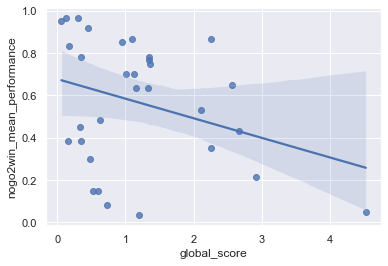

In [85]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2win_mean_performance' )

In [86]:
test_res = stats.pearsonr(perf_questionnaire_data.global_score, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.3195358932167506
p-value:  0.07972943502042176


### 👆 by correcting some computation the p-value increased 

1. mean_nogo2win replaced with first_nogo2win

### OLS regression

In [87]:
smf.ols(formula = 'nogo2win_mean_performance ~ global_score', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.102
Model:                                   OLS   Adj. R-squared:                  0.071
Method:                        Least Squares   F-statistic:                     3.298
Date:                       Tue, 14 Dec 2021   Prob (F-statistic):             0.0797
Time:                               21:47:09   Log-Likelihood:                -4.0147
No. Observations:                         31   AIC:                             12.03
Df Residuals:                             29   BIC:                             14.90
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6773      0.079      8.588      0.000       0.516       0.839
global_score    -0.0927      0.051     -1.816      0.080      -0.197       0.012
==============================================================================
Omnibus:                        4.089   Durbin-Watson:                   2.736
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                2.732
Skew:                          -0.549   Prob(JB):                        0.255
Kurtosis:                       2.046   Cond. No.                         3.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multi-level regression

In [88]:
md = smf.mixedlm(formula = 'nogo2win_mean_performance ~ global_score', data = perf_questionnaire_data, groups = perf_questionnaire_data.gender_first_session)
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nogo2win_mean_performance
No. Observations: 31      Method:             REML                     
No. Groups:       2       Scale:              0.0811                   
Min. group size:  13      Likelihood:         -8.1585                  
Max. group size:  18      Converged:          Yes                      
Mean group size:  15.5                                                 
--------------------------------------------------------------------------
                 Coef.     Std.Err.      z       P>|z|    [0.025    0.975]
--------------------------------------------------------------------------
Intercept         0.677       0.079     8.587    0.000     0.523     0.832
global_score     -0.093       0.052    -1.780    0.075    -0.195     0.009
Group Var         0.000       0.030                                       



/opt/homebrew/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### 👇 First performance of NoGo2Win Vs. global score

* Please note that an individual in our data has participated in the first and third round but no second. and his data has effects on the p-value.

In [96]:
perf_questionnaire_data_for_first_round = pd.merge(Questionnare_data, first_round_perfornance, on='mturkID' )
perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round.drop_duplicates(subset = 'mturkID')
# perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round[perf_questionnaire_data_for_first_round.mturkID != 'A1PAY3X73PQ16S']
perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round[(perf_questionnaire_data_for_first_round['data_quality'] != 0)]

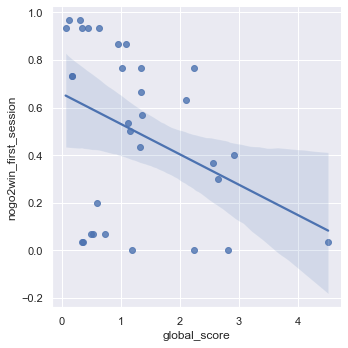

In [100]:
sns.lmplot(data = perf_questionnaire_data_for_first_round, x = 'global_score', y = 'nogo2win_first_session' )

In [101]:
smf.ols(formula = 'nogo2win_first_session ~ global_score', data = perf_questionnaire_data_for_first_round).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     nogo2win_first_session   R-squared:                       0.138
Model:                                OLS   Adj. R-squared:                  0.110
Method:                     Least Squares   F-statistic:                     4.818
Date:                    Tue, 14 Dec 2021   Prob (F-statistic):             0.0360
Time:                            21:48:53   Log-Likelihood:                -9.5814
No. Observations:                      32   AIC:                             23.16
Df Residuals:                          30   BIC:                             26.09
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6585      0.093      7.088      0.000       0.469       0.848
global_score    -0.1275      0.058     -2.195      0.036      -0.246      -0.009
==============================================================================
Omnibus:                        6.257   Durbin-Watson:                   2.510
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                3.475
Skew:                          -0.595   Prob(JB):                        0.176
Kurtosis:                       1.908   Cond. No.                         3.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
md = smf.mixedlm(formula = 'nogo2win_first_session ~ global_score', data = perf_questionnaire_data_for_first_round, groups = perf_questionnaire_data_for_first_round.gender_first_session)
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nogo2win_first_session
No. Observations: 32      Method:             REML                  
No. Groups:       3       Scale:              0.1137                
Min. group size:  1       Likelihood:         -13.4424              
Max. group size:  18      Converged:          Yes                   
Mean group size:  10.7                                              
----------------------------------------------------------------------
                  Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
----------------------------------------------------------------------
Intercept          0.659      0.093    7.062   0.000    0.476    0.841
global_score      -0.127      0.058   -2.191   0.028   -0.242   -0.013
Group Var          0.000      0.058                                   



/opt/homebrew/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### 👇 First session relative performance of NoGo2Win Vs. global score

Text(0, 0.5, '(GW - NGW) performance')

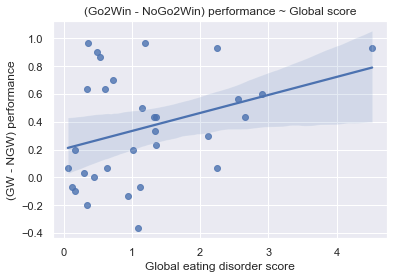

In [103]:
plt.figure()

sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'first_rel_nogo2win' )
plt.title('(Go2Win - NoGo2Win) performance ~ Global score')

plt.xlabel('Global eating disorder score')
plt.ylabel('(GW - NGW) performance')



In [104]:
smf.ols(formula = 'first_rel_nogo2win ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     first_rel_nogo2win   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3.759
Date:                Tue, 14 Dec 2021   Prob (F-statistic):             0.0623
Time:                        21:49:07   Log-Likelihood:                -12.421
No. Observations:                  31   AIC:                             28.84
Df Residuals:                      29   BIC:                             31.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2043      0.103      1.975      0.058      -0.007       0.416
global_score     0.1298      0.067      1.939      0.062      -0.007       0.267
==============================================================================
Omnibus:                        1.304   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.197
Skew:                           0.337   Prob(JB):                        0.550
Kurtosis:                       2.314   Cond. No.                         3.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
md = smf.mixedlm(formula = 'first_rel_nogo2win ~ global_score', data = perf_questionnaire_data.drop(15), groups = perf_questionnaire_data.drop(15).BMI)
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: first_rel_nogo2win
No. Observations: 27      Method:             REML              
No. Groups:       27      Scale:              0.0659            
Min. group size:  1       Likelihood:         -13.4692          
Max. group size:  1       Converged:          Yes               
Mean group size:  1.0                                           
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       0.198      0.027   7.344   0.000    0.145    0.251
global_score    0.121      0.056   2.160   0.031    0.011    0.230
Group Var       0.066                                             



/opt/homebrew/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


### 👇 Second session relative performance of NoGo2Win Vs. global score

Text(0, 0.5, ' 2nd (NGW) performance')

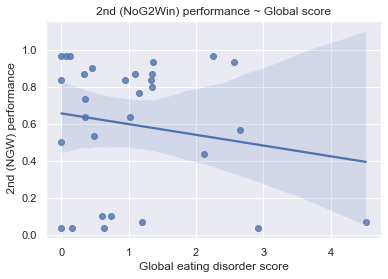

In [61]:
plt.figure()

sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2win_second_session' )
plt.title('2nd (NoG2Win) performance ~ Global score')

plt.xlabel('Global eating disorder score')
plt.ylabel(' 2nd (NGW) performance')



In [60]:
smf.ols(formula = 'nogo2win_second_session ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     nogo2win_second_session   R-squared:                       0.030
Model:                                 OLS   Adj. R-squared:                 -0.005
Method:                      Least Squares   F-statistic:                    0.8634
Date:                     Sat, 11 Dec 2021   Prob (F-statistic):              0.361
Time:                             23:47:39   Log-Likelihood:                -10.759
No. Observations:                       30   AIC:                             25.52
Df Residuals:                           28   BIC:                             28.32
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6554      0.093      7.010      0.000       0.464       0.847
global_score    -0.0580      0.062     -0.929      0.361      -0.186       0.070
==============================================================================
Omnibus:                        5.935   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                3.467
Skew:                          -0.632   Prob(JB):                        0.177
Kurtosis:                       1.916   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Nogo2AvoidPun and Food disorder index

<AxesSubplot:xlabel='global_score', ylabel='nogo2avoidPun_first_session'>

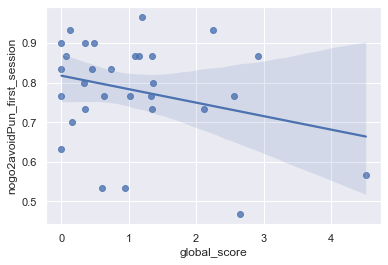

In [74]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2avoidPun_first_session' )

In [75]:
smf.ols(formula = 'nogo2avoidPun_first_session ~ global_score', data = perf_questionnaire_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     nogo2avoidPun_first_session   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.048
Method:                          Least Squares   F-statistic:                     2.466
Date:                         Sun, 12 Dec 2021   Prob (F-statistic):              0.128
Time:                                 08:24:32   Log-Likelihood:                 20.958
No. Observations:                           30   AIC:                            -37.92
Df Residuals:                               28   BIC:                            -35.11
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8175      0.032     25.170      0.000       0.751       0.884
global_score    -0.0341      0.022     -1.570      0.128      -0.078       0.010
==============================================================================
Omnibus:                        3.325   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.547
Skew:                          -0.714   Prob(JB):                        0.280
Kurtosis:                       2.972   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Gender Analysis

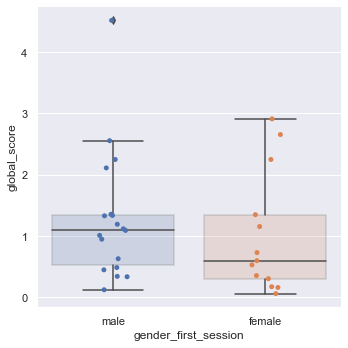

In [64]:
ax = sns.catplot(x = 'gender_first_session', y = 'global_score', data = perf_questionnaire_data)
ax = sns.boxplot(x = 'gender_first_session', y = 'global_score',boxprops=dict(alpha=.2), data = perf_questionnaire_data)

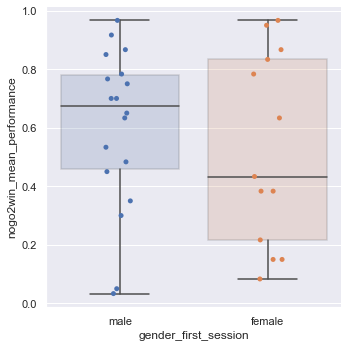

In [65]:
ax = sns.catplot(x = 'gender_first_session', y = 'nogo2win_mean_performance', data = perf_questionnaire_data)
ax = sns.boxplot(x = 'gender_first_session', y = 'nogo2win_mean_performance',boxprops=dict(alpha=.2), data = perf_questionnaire_data)

<Figure size 432x288 with 0 Axes>

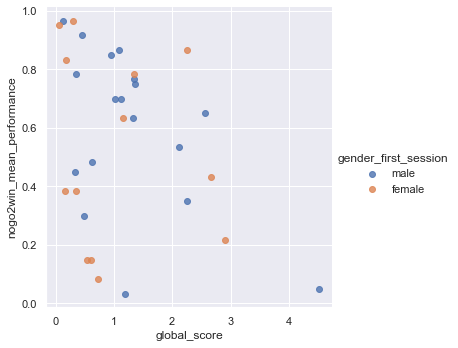

In [66]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="global_score", data=perf_questionnaire_data, fit_reg=False, hue='gender_first_session', legend=True)
# plt.title

# Age Vs. NoGo2Win Performance

<Figure size 432x288 with 0 Axes>

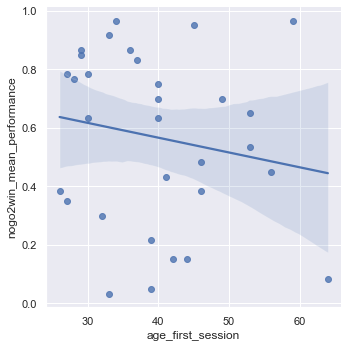

In [67]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="age_first_session", data=perf_questionnaire_data,  fit_reg=True)
# plt.title

In [68]:
smf.ols(formula = 'nogo2win_mean_performance ~ age_first_session', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.030
Model:                                   OLS   Adj. R-squared:                 -0.004
Method:                        Least Squares   F-statistic:                    0.8948
Date:                       Tue, 14 Dec 2021   Prob (F-statistic):              0.352
Time:                               21:41:32   Log-Likelihood:                -5.2131
No. Observations:                         31   AIC:                             14.43
Df Residuals:                             29   BIC:                             17.29
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7683      0.218      3.524      0.001       0.322       1.214
age_first_session    -0.0051      0.005     -0.946      0.352      -0.016       0.006
==============================================================================
Omnibus:                        3.158   Durbin-Watson:                   2.538
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                1.855
Skew:                          -0.348   Prob(JB):                        0.396
Kurtosis:                       2.024   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BMI index vs. nogo2win performance

<Figure size 432x288 with 0 Axes>

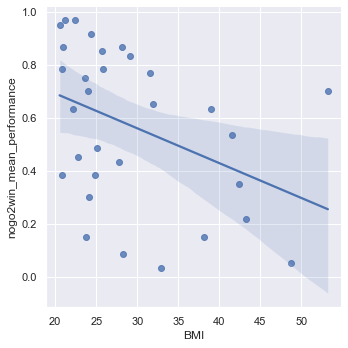

In [69]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="BMI", data=perf_questionnaire_data,  fit_reg=True)
# plt.title

In [70]:
smf.ols(formula = 'nogo2win_mean_performance ~ BMI', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.156
Model:                                   OLS   Adj. R-squared:                  0.127
Method:                        Least Squares   F-statistic:                     5.376
Date:                       Tue, 14 Dec 2021   Prob (F-statistic):             0.0277
Time:                               21:41:40   Log-Likelihood:                -3.0479
No. Observations:                         31   AIC:                             10.10
Df Residuals:                             29   BIC:                             12.96
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9534      0.173      5.500      0.000       0.599       1.308
BMI           -0.0131      0.006     -2.319      0.028      -0.025      -0.002
==============================================================================
Omnibus:                        4.255   Durbin-Watson:                   3.051
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                2.220
Skew:                          -0.389   Prob(JB):                        0.330
Kurtosis:                       1.945   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression 
* for the curiosity

In [74]:
smf.ols(formula = 'nogo2win_mean_performance ~  global_score + gender_first_session', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.131
Model:                                   OLS   Adj. R-squared:                  0.068
Method:                        Least Squares   F-statistic:                     2.102
Date:                       Tue, 14 Dec 2021   Prob (F-statistic):              0.141
Time:                               21:43:15   Log-Likelihood:                -3.5157
No. Observations:                         31   AIC:                             13.03
Df Residuals:                             28   BIC:                             17.33
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.6268      0.095      6.600      0.000       0.432       0.821
gender_first_session[T.male]     0.1002      0.105      0.957      0.347      -0.114       0.315
global_score                    -0.0993      0.052     -1.925      0.065      -0.205       0.006
==============================================================================
Omnibus:                        2.644   Durbin-Watson:                   2.725
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                1.903
Skew:                          -0.424   Prob(JB):                        0.386
Kurtosis:                       2.132   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Restraint Index Vs. nogo2win Performance

<AxesSubplot:xlabel='restraint', ylabel='nogo2win_mean_performance'>

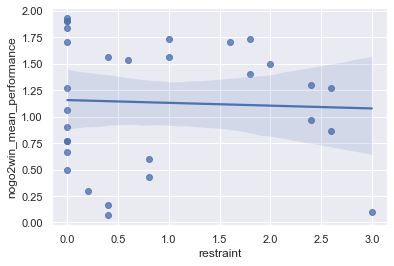

In [103]:
sns.regplot(data = perf_questionnaire_data, x = 'restraint', y = 'nogo2win_mean_performance')

In [104]:
test_res = stats.pearsonr(perf_questionnaire_data.restraint, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.04469771336329133
p-value:  0.8145706669007483


# Eating Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='eating_concern', ylabel='nogo2win_mean_performance'>

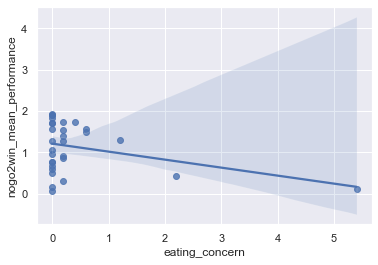

In [105]:
sns.regplot(data = perf_questionnaire_data, x = 'eating_concern', y = 'nogo2win_mean_performance')

In [203]:
smf.ols(formula = 'nogo2win_mean_performance ~ eating_concern', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.118
Model:                                   OLS   Adj. R-squared:                  0.087
Method:                        Least Squares   F-statistic:                     3.756
Date:                       Sat, 11 Dec 2021   Prob (F-statistic):             0.0628
Time:                               16:10:15   Log-Likelihood:                -24.390
No. Observations:                         30   AIC:                             52.78
Df Residuals:                             28   BIC:                             55.58
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2095      0.110     10.962      0.000       0.983       1.435
eating_concern    -0.1936      0.100     -1.938      0.063      -0.398       0.011
==============================================================================
Omnibus:                        3.331   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                2.086
Skew:                          -0.428   Prob(JB):                        0.352
Kurtosis:                       2.033   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Weight Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='weight_concern', ylabel='nogo2win_mean_performance'>

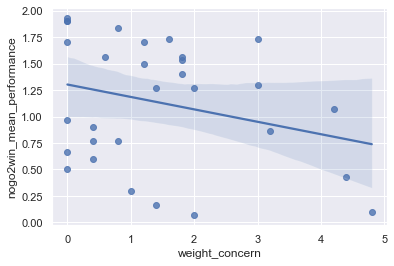

In [107]:
sns.regplot(data = perf_questionnaire_data, x = 'weight_concern', y = 'nogo2win_mean_performance')

In [108]:
test_res = stats.pearsonr(perf_questionnaire_data.weight_concern, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.27675977097280535
p-value:  0.1387238996234363


# Shape Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='shape_concern', ylabel='nogo2win_mean_performance'>

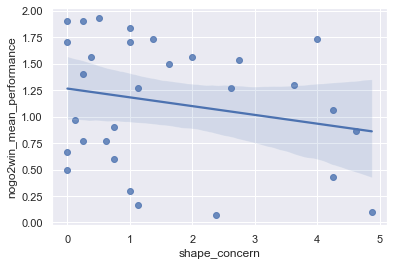

In [109]:
sns.regplot(data = perf_questionnaire_data, x = 'shape_concern', y = 'nogo2win_mean_performance')

In [110]:
test_res = stats.pearsonr(perf_questionnaire_data.shape_concern, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.220069490747774
p-value:  0.24258644705673107


# Pet Analysis

# Nogo 2 Win Performance Vs. has pet?

### we have not enough data to compare these 2 groups

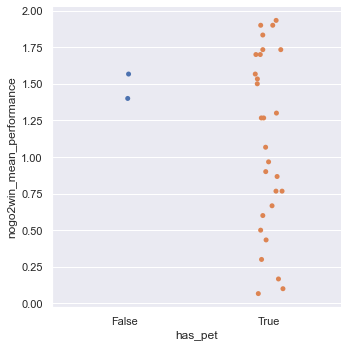

In [112]:
sns.catplot(x = 'has_pet', y = 'nogo2win_mean_performance', data = perf_questionnaire_data)

# Nogo 2 Win Performance Vs. Number of Pets

<AxesSubplot:xlabel='pet-number', ylabel='nogo2win_mean_performance'>

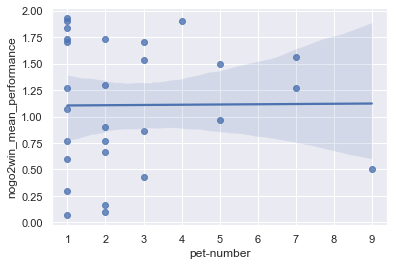

In [113]:
sns.regplot(data = perf_questionnaire_data, x = 'pet-number', y = 'nogo2win_mean_performance')

In [119]:
test_res = stats.pearsonr(perf_questionnaire_data.drop([4,27])['pet-number'], perf_questionnaire_data.drop([4,27]).nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   0.008093071450305522
p-value:  0.9673974584029452


In [120]:
def clean_pet_type(pet_type):
    if all(x in pet_type for x in ['cat', 'dog']):
        return "both"
    elif('dog' in pet_type):
        return "dog"
    elif('cat' in pet_type):
        return "cat"
    else:
        return ""


In [122]:
perf_questionnaire_data_has_pet = perf_questionnaire_data.drop([4,27])

In [123]:
perf_questionnaire_data_has_pet["pet-type"] = perf_questionnaire_data_has_pet["pet-type"].map(lambda x: clean_pet_type(x))

# Nogo 2 Win Performance Vs. pet type

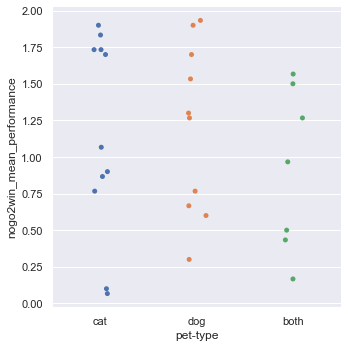

In [125]:
sns.catplot(x = 'pet-type', y = 'nogo2win_mean_performance', data = perf_questionnaire_data_has_pet)